<ipython-input-5-e3f20d0f86af>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[0], xticklabels=['' for i in axes[0].get_xticklabels()])
<ipython-input-5-e3f20d0f86af>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[0], yticklabels=['' for i in axes[0].get_yticklabels()])
<ipython-input-5-e3f20d0f86af>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[1], xticklabels=['' for i in axes[1].get_xticklabels()])
<ipython-input-5-e3f20d0f86af>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[1], yticklabels=['' for i in axes[1].get_yticklabels()])
<ipython-input-5-e3f20d0f86af>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[2], xticklabels=['' for i in axes[2].get_xticklabels()])
<ipython-input-5-e3f20d0f86af>:46: UserWarning: FixedFormatter should only be used to

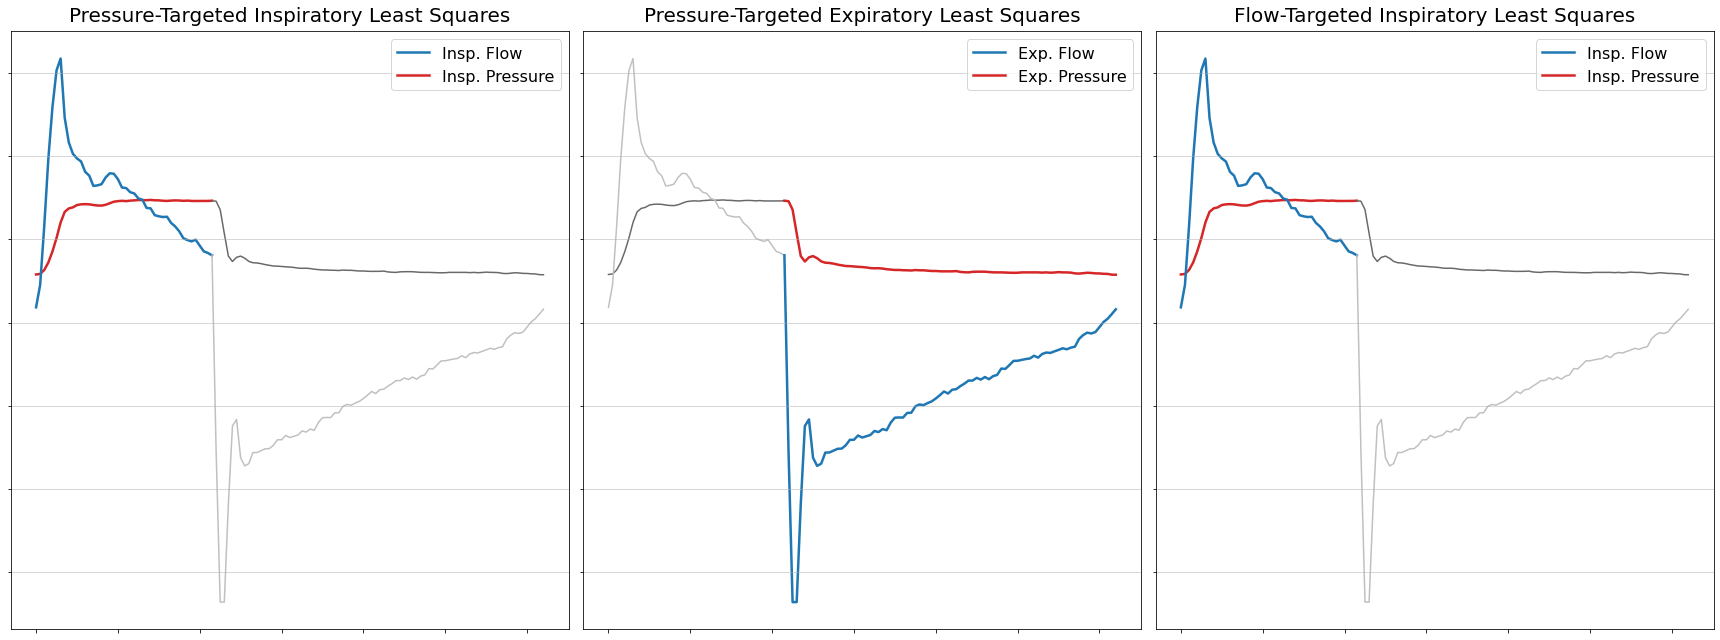

<ipython-input-5-e3f20d0f86af>:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[idx_g0], xticklabels=['' for i in axes[idx_g0].get_xticklabels()])
<ipython-input-5-e3f20d0f86af>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[idx_g0], yticklabels=['' for i in axes[idx_g0].get_yticklabels()])
<ipython-input-5-e3f20d0f86af>:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[idx_g1], xticklabels=['' for i in axes[idx_g1].get_xticklabels()])
<ipython-input-5-e3f20d0f86af>:85: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[idx_g1], yticklabels=['' for i in axes[idx_g1].get_yticklabels()])
<ipython-input-5-e3f20d0f86af>:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes[idx_g2], xticklabels=['' for i in axes[idx_g2].get_xticklabels()])
<ipython-input-5-e3f20d0f86af>:96: 

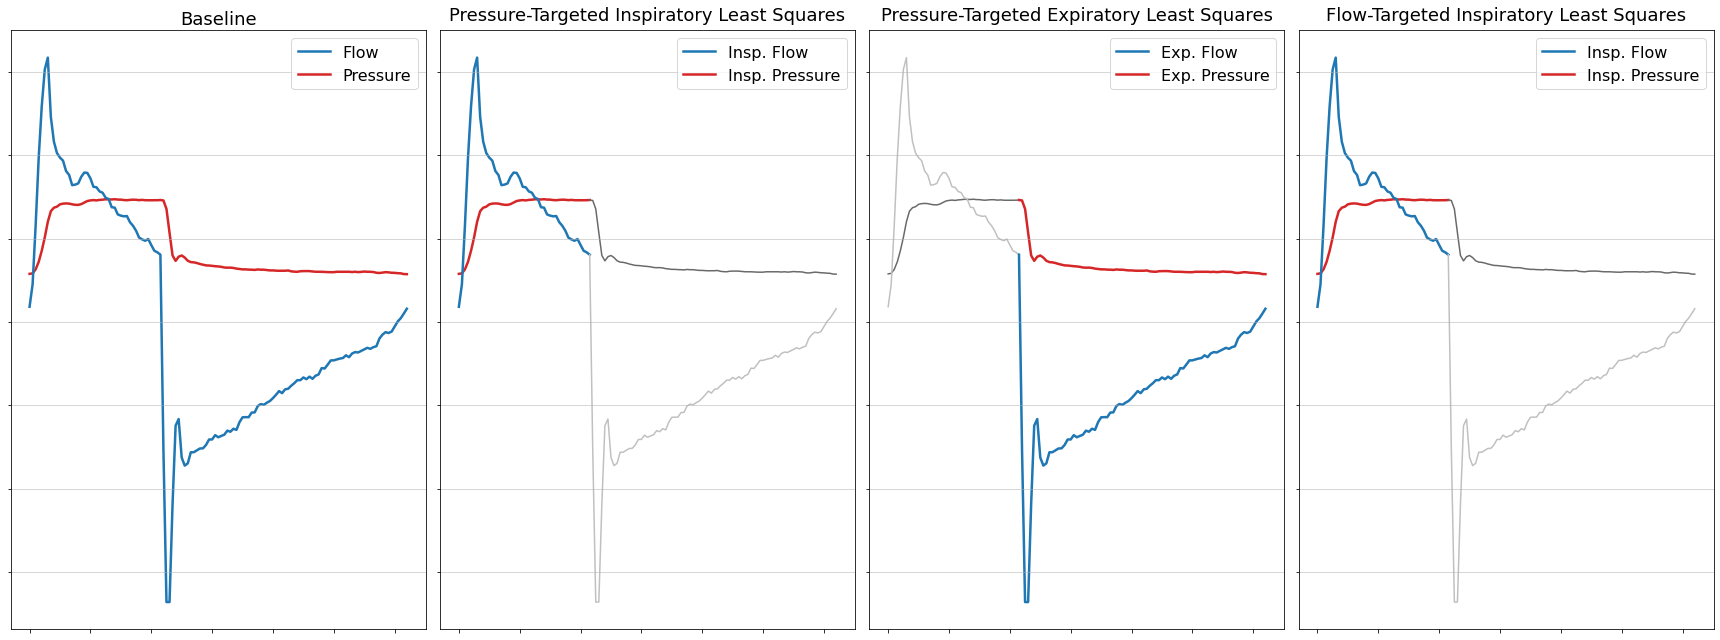

In [5]:
import argparse

import matplotlib.pyplot as plt
from ventmap.raw_utils import PB840File
from ventmap.breath_meta import get_production_breath_meta


file = 'real_time_tor4.csv.test'

generator = PB840File(open(file)).extract_raw(False)
for breath in generator:
    flow, pressure = breath['flow'], breath['pressure']
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3*8, 3*3))

    meta = get_production_breath_meta(breath, to_series=True)
    x0 = meta.x0_index
    insp_idxs = range(x0)
    exp_idxs = range(x0-1, len(flow))
    highlight_lw = 2.5
    axes[0].plot(insp_idxs, flow[:x0], color='tab:blue', zorder=1, lw=highlight_lw, label='Insp. Flow')
    axes[0].plot(insp_idxs, pressure[:x0], color='tab:red', zorder=0, lw=highlight_lw, label='Insp. Pressure')
    axes[0].plot(exp_idxs, flow[x0-1:], color='silver', zorder=1)
    axes[0].plot(exp_idxs, pressure[x0-1:], color='dimgray', zorder=0)
    axes[0].grid(True, lw=.5, axis='y')
    plt.setp(axes[0], xticklabels=['' for i in axes[0].get_xticklabels()])
    plt.setp(axes[0], yticklabels=['' for i in axes[0].get_yticklabels()])
    axes[0].legend(fontsize=16)
    axes[0].set_title('Pressure-Targeted Inspiratory Least Squares', fontsize=20, pad=10.0)
    
    axes[1].plot(insp_idxs, flow[:x0], color='silver', zorder=1)
    axes[1].plot(insp_idxs, pressure[:x0], color='dimgray', zorder=0)
    axes[1].plot(exp_idxs, flow[x0-1:], color='tab:blue', zorder=1, lw=highlight_lw, label='Exp. Flow')
    axes[1].plot(exp_idxs, pressure[x0-1:], color='tab:red', zorder=0, lw=highlight_lw, label='Exp. Pressure')
    axes[1].grid(True, lw=.5, axis='y')
    plt.setp(axes[1], xticklabels=['' for i in axes[1].get_xticklabels()])
    plt.setp(axes[1], yticklabels=['' for i in axes[1].get_yticklabels()])
    axes[1].legend(fontsize=16)
    axes[1].set_title('Pressure-Targeted Expiratory Least Squares', fontsize=20, pad=10.0)
    
    axes[2].plot(insp_idxs, flow[:x0], color='tab:blue', zorder=1, lw=highlight_lw, label='Insp. Flow')
    axes[2].plot(insp_idxs, pressure[:x0], color='tab:red', zorder=0, lw=highlight_lw, label='Insp. Pressure')
    axes[2].plot(exp_idxs, flow[x0-1:], color='silver', zorder=1)
    axes[2].plot(exp_idxs, pressure[x0-1:], color='dimgray', zorder=0)
    axes[2].grid(True, lw=.5, axis='y')
    plt.setp(axes[2], xticklabels=['' for i in axes[2].get_xticklabels()])
    plt.setp(axes[2], yticklabels=['' for i in axes[2].get_yticklabels()])
    axes[2].legend(fontsize=16)
    axes[2].set_title('Flow-Targeted Inspiratory Least Squares', fontsize=20, pad=10.0)
    
    plt.tight_layout()
    fig.savefig('least_squares_three_figs.png', dpi=300)
    plt.show(fig)
    plt.close()
    
    
generator = PB840File(open(file)).extract_raw(False)
for breath in generator:
    flow, pressure = breath['flow'], breath['pressure']
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(3*8, 3*3))

    meta = get_production_breath_meta(breath, to_series=True)
    x0 = meta.x0_index
    insp_idxs = range(x0)
    exp_idxs = range(x0-1, len(flow))
    highlight_lw = 2.5
    title_fontsize= 18
    legend_fontsize = 15
    
    idx_g0 = 0
    axes[idx_g0].plot(flow, color='tab:blue', zorder=1, lw=highlight_lw, label='Flow')
    axes[idx_g0].plot(pressure, color='tab:red', zorder=0, lw=highlight_lw, label='Pressure')
    axes[idx_g0].set_title('Baseline', fontsize=title_fontsize)
    axes[idx_g0].grid(True, lw=.5, axis='y')
    axes[idx_g0].legend(fontsize=16)
    plt.setp(axes[idx_g0], xticklabels=['' for i in axes[idx_g0].get_xticklabels()])
    plt.setp(axes[idx_g0], yticklabels=['' for i in axes[idx_g0].get_yticklabels()])
    
    idx_g1 = 1
    axes[idx_g1].plot(insp_idxs, flow[:x0], color='tab:blue', zorder=1, lw=highlight_lw, label='Insp. Flow')
    axes[idx_g1].plot(insp_idxs, pressure[:x0], color='tab:red', zorder=0, lw=highlight_lw, label='Insp. Pressure')
    axes[idx_g1].plot(exp_idxs, flow[x0-1:], color='silver', zorder=1)
    axes[idx_g1].plot(exp_idxs, pressure[x0-1:], color='dimgray', zorder=0)
    axes[idx_g1].grid(True, lw=.5, axis='y')
    plt.setp(axes[idx_g1], xticklabels=['' for i in axes[idx_g1].get_xticklabels()])
    plt.setp(axes[idx_g1], yticklabels=['' for i in axes[idx_g1].get_yticklabels()])
    axes[idx_g1].legend(fontsize=16)
    axes[idx_g1].set_title('Pressure-Targeted Inspiratory Least Squares', fontsize=title_fontsize, pad=10.0)
    
    idx_g2 = 2
    axes[idx_g2].plot(insp_idxs, flow[:x0], color='silver', zorder=1)
    axes[idx_g2].plot(insp_idxs, pressure[:x0], color='dimgray', zorder=0)
    axes[idx_g2].plot(exp_idxs, flow[x0-1:], color='tab:blue', zorder=1, lw=highlight_lw, label='Exp. Flow')
    axes[idx_g2].plot(exp_idxs, pressure[x0-1:], color='tab:red', zorder=0, lw=highlight_lw, label='Exp. Pressure')
    axes[idx_g2].grid(True, lw=.5, axis='y')
    plt.setp(axes[idx_g2], xticklabels=['' for i in axes[idx_g2].get_xticklabels()])
    plt.setp(axes[idx_g2], yticklabels=['' for i in axes[idx_g2].get_yticklabels()])
    axes[idx_g2].legend(fontsize=16)
    axes[idx_g2].set_title('Pressure-Targeted Expiratory Least Squares', fontsize=title_fontsize, pad=10.0)
    
    idx_g3 = 3
    axes[idx_g3].plot(insp_idxs, flow[:x0], color='tab:blue', zorder=1, lw=highlight_lw, label='Insp. Flow')
    axes[idx_g3].plot(insp_idxs, pressure[:x0], color='tab:red', zorder=0, lw=highlight_lw, label='Insp. Pressure')
    axes[idx_g3].plot(exp_idxs, flow[x0-1:], color='silver', zorder=1)
    axes[idx_g3].plot(exp_idxs, pressure[x0-1:], color='dimgray', zorder=0)
    axes[idx_g3].grid(True, lw=.5, axis='y')
    plt.setp(axes[idx_g3], xticklabels=['' for i in axes[idx_g3].get_xticklabels()])
    plt.setp(axes[idx_g3], yticklabels=['' for i in axes[idx_g3].get_yticklabels()])
    axes[idx_g3].legend(fontsize=16)
    axes[idx_g3].set_title('Flow-Targeted Inspiratory Least Squares', fontsize=title_fontsize, pad=10.0)
    
    plt.tight_layout()
    fig.savefig('least_squares_four_figs.png', dpi=300)
    plt.show(fig)
    


<ipython-input-6-3272fb9fc9e1>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax0, xticklabels=['' for i in ax0.get_xticklabels()])
<ipython-input-6-3272fb9fc9e1>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax0, yticklabels=['' for i in ax0.get_yticklabels()])
<ipython-input-6-3272fb9fc9e1>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax2, xticklabels=['' for i in ax2.get_xticklabels()])
<ipython-input-6-3272fb9fc9e1>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax2, yticklabels=['' for i in ax2.get_yticklabels()])
<ipython-input-6-3272fb9fc9e1>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax1, xticklabels=['' for i in ax1.get_xticklabels()])
<ipython-input-6-3272fb9fc9e1>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(ax1,

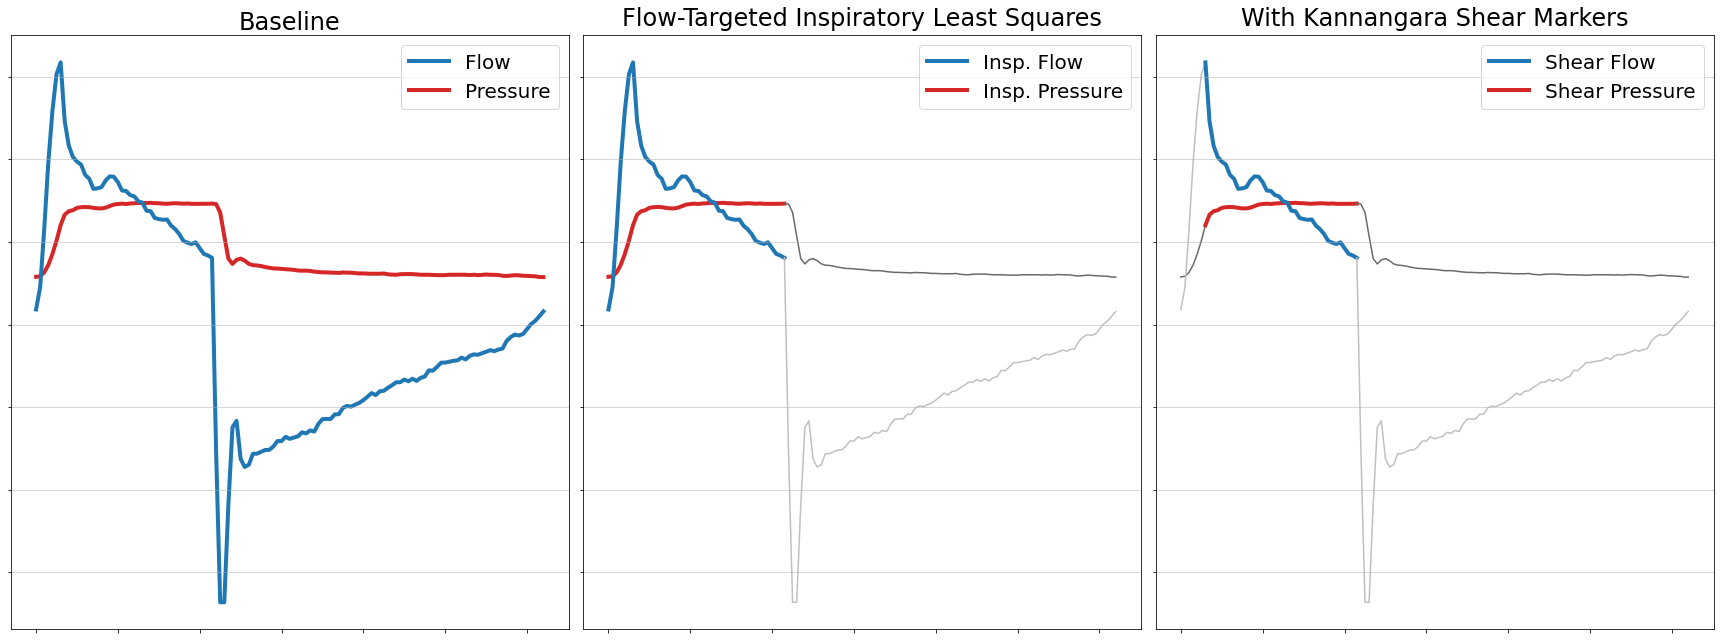

In [6]:
from parliament.pressure_ctrl_correction import shear_transform

file = 'real_time_tor4.csv.test'

generator = PB840File(open(file)).extract_raw(False)
for breath in generator:
    flow, pressure = breath['flow'], breath['pressure']

    meta = get_production_breath_meta(breath, to_series=True)
    x0 = meta.x0_index
    dt = breath['dt']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(3*8, 3*3))
    
    highlight_lw = 4
    title_fontsize = 24
    legend_fontsize = 20
    ax0 = axes[0]
    ax2 = axes[1]
    ax1 = axes[2]
    
    insp_idxs = range(x0)
    exp_idxs = range(x0-1, len(flow))
    
    shear_left, shear_right = shear_transform(pressure, flow, x0, dt)
    
    ax0.plot(flow, color='tab:blue', zorder=1, lw=highlight_lw, label='Flow')
    ax0.plot(pressure, color='tab:red', zorder=0, lw=highlight_lw, label='Pressure')
    ax0.set_title('Baseline', fontsize=title_fontsize)
    ax0.grid(True, lw=.5, axis='y')
    ax0.legend(fontsize=legend_fontsize)
    plt.setp(ax0, xticklabels=['' for i in ax0.get_xticklabels()])
    plt.setp(ax0, yticklabels=['' for i in ax0.get_yticklabels()])
    
    before_shear_idxs = range(shear_left)
    shear_idxs = range(shear_left-1, shear_right)
    after_shear_idxs = range(shear_right-1, len(flow))
    
    ax2.plot(insp_idxs, flow[:x0], color='tab:blue', zorder=1, lw=highlight_lw, label='Insp. Flow')
    ax2.plot(insp_idxs, pressure[:x0], color='tab:red', zorder=0, lw=highlight_lw, label='Insp. Pressure')
    ax2.plot(exp_idxs, flow[x0-1:], color='silver', zorder=1)
    ax2.plot(exp_idxs, pressure[x0-1:], color='dimgray', zorder=0)
    ax2.grid(True, lw=.5, axis='y')
    plt.setp(ax2, xticklabels=['' for i in ax2.get_xticklabels()])
    plt.setp(ax2, yticklabels=['' for i in ax2.get_yticklabels()])
    ax2.legend(fontsize=legend_fontsize)
    ax2.set_title('Flow-Targeted Inspiratory Least Squares', fontsize=title_fontsize, pad=10.0)
    
    ax1.plot(before_shear_idxs, flow[:shear_left], color='silver', zorder=1)
    ax1.plot(before_shear_idxs, pressure[:shear_left], color='dimgray', zorder=0)
    ax1.plot(shear_idxs, flow[shear_left-1:shear_right], color='tab:blue', zorder=1, lw=highlight_lw, label='Shear Flow')
    ax1.plot(shear_idxs, pressure[shear_left-1:shear_right], color='tab:red', zorder=0, lw=highlight_lw, label='Shear Pressure')
    ax1.plot(after_shear_idxs, flow[shear_right-1:], color='silver', zorder=1)
    ax1.plot(after_shear_idxs, pressure[shear_right-1:], color='dimgray', zorder=0)
    ax1.grid(True, lw=.5, axis='y')
    plt.setp(ax1, xticklabels=['' for i in ax1.get_xticklabels()])
    plt.setp(ax1, yticklabels=['' for i in ax1.get_yticklabels()])
    ax1.legend(fontsize=legend_fontsize)
    ax1.set_title('With Kannangara Shear Markers', fontsize=title_fontsize, pad=10.0)
    
    plt.tight_layout()
    fig.savefig('kannangara_shear_demo.png', dpi=300)